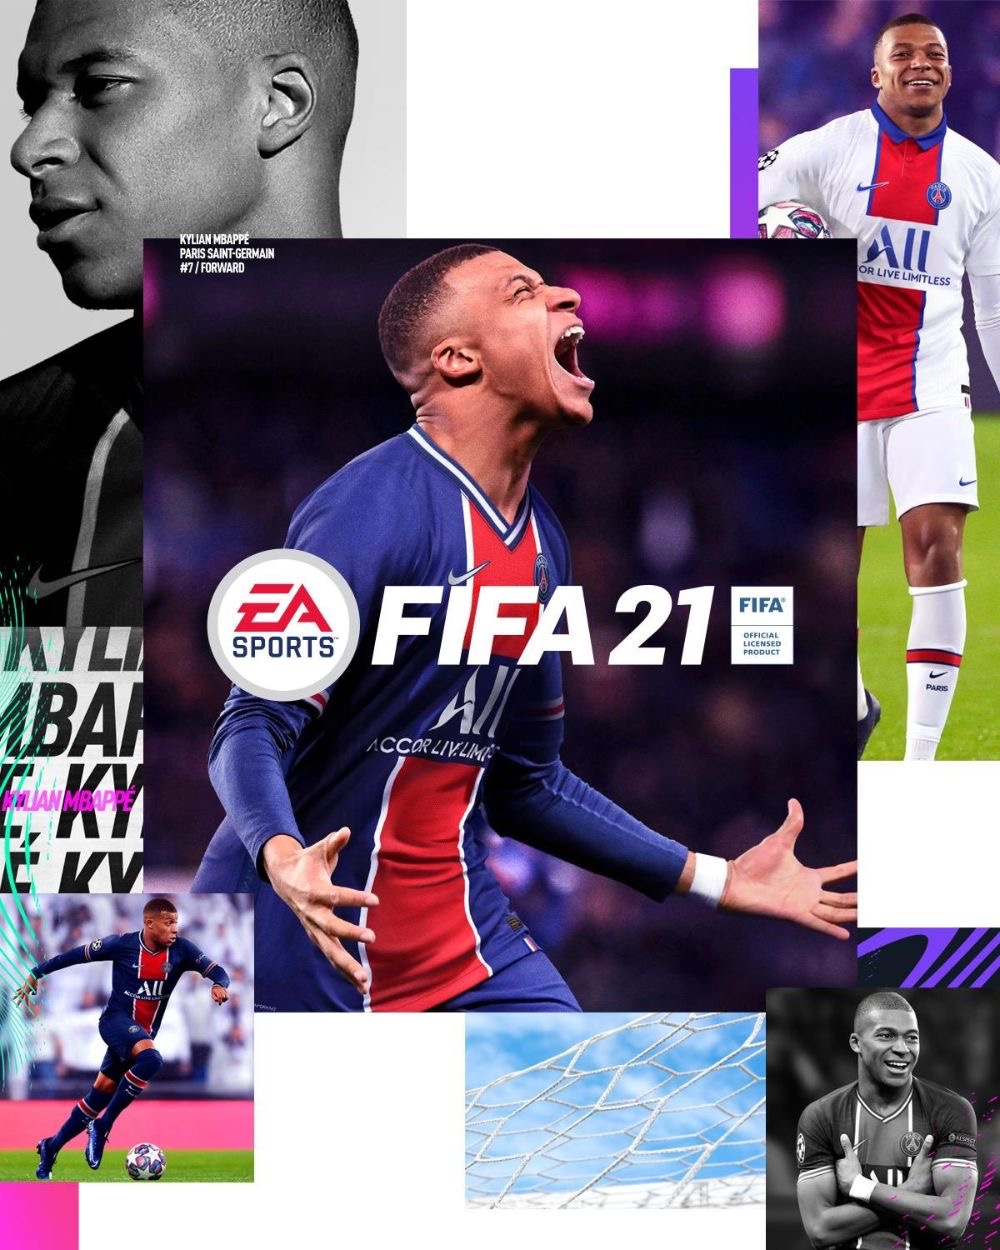

FIFA 21 is a football simulation video game published by Electronic Arts as part of the FIFA series. It’s the 28th installment in the series and was released on October 9, 2020. The game features various modes, including Ultimate Team, Career Mode, and VOLTA Football, and it brings to life the experience of playing in big leagues with detailed realism1. Players can build their dream teams, manage their favorite clubs, and compete against others in a variety of settings, from professional stadiums to street football environments

In [ ]:
# Web scrapped data from Kaggle
# Very Messy and needs cleaning
# It's about the players in FIFA 21 with all details of theirs
# Goal is to clean, create pivot tables and visualize

In [ ]:
# Steps to Clean
# * Import the data
# * Create duplicate and start ED
# * Get meaning for all the columns
# * Start the cleaning proper
# Create Pivot Tables and Visualize

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original=pd.read_csv('fifa21_raw_data.csv')
country_info=pd.read_csv('Country_Continent.csv')
club_details=pd.read_csv('teamlist.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_23200\2502436436.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  original=pd.read_csv('fifa21_raw_data.csv')


In [ ]:
original.shape

In [ ]:
dup_data=original.copy()

In [ ]:
dup_data.shape

In [ ]:
pd.set_option('display.max.columns',77)

In [ ]:
dup_data.head(5)

In [ ]:
dup_data.info()

In [ ]:
dup_data[dup_data['ID'].duplicated()]

In [ ]:
dup_data[dup_data['LongName']=='Kevin Berlaso']

In [ ]:
dup_data=dup_data.drop_duplicates(subset='ID',keep='first')
dup_data

In [ ]:
dup_data=dup_data.reset_index(drop=True)

In [ ]:
dup_data[dup_data['LongName']=='Kevin Berlaso']

In [ ]:
dup_data.shape

In [ ]:
dup_data.columns

## Context for the Columns
* photoUrl: The URL to the player’s photo.  
* LongName: The full name of the player.  
* playerUrl: The URL to the player’s profile.  
* Nationality: The country the player represents.  
* Positions: The positions on the field where the player can play.  
* Name: The common name or short name of the player.  
* Age: The player’s age.  
* ↓OVA: The overall rating of the player in the game.  
* POT: The potential rating, indicating how much a player can improve.  
* Team & Contract: The club team the player is currently signed with and the contract details.  
* ID: A unique identifier for the player in the game.  
* Height: The height of the player.  
* Weight: The weight of the player.  
* foot: The preferred foot of the player (left or right).  
* BOV: Best Overall rating, the highest rating a player has at any position.  
* BP: Best Position, the position where the player has the highest rating.  
* Growth: The potential growth in the player’s rating.  
* Joined: The date when the player joined their current team.  
* Loan Date End: If applicable, the date when the player’s loan to another team ends.  
* Value: The market value of the player in the game.  
* Wage: The wage the player receives in the game.  
* Release Clause: The fee required to buy the player out of their contract.  
* Attacking, Skill, Movement, Power, Mentality, Defending, Goalkeeping: These columns contain specific attributes related to the player’s skills in different areas of the game.  
* Total Stats: The sum of all individual stats.  
* Base Stats: The sum of six key stats that represent a player’s abilities.  
* W/F: Weak Foot ability.  
* SM: Skill Moves rating.  
* A/W: Attacking Work Rate.  
* D/W: Defensive Work Rate.  
* IR: International Reputation.  
* PAC, SHO, PAS, DRI, DEF, PHY: These are abbreviations for Pace, Shooting, Passing, Dribbling, Defense, and Physical, respectively, which are key attributes for a player.  
* Hits: The popularity of the player in the game, possibly measured by the number of times players have viewed or selected the player.


In [ ]:
# Deep Cleaning.
# Columns to be Renamed Height = Height(FT)/Weight=Weight(lbs)/Value=Value(€/M)/Wage=Wage(€/K)/Release Clause=Release Clause(€/K)
# IR=IR(★)/W/F=W/F(★)/SM=SM(★)
# Create Columns (Num of Years in the Club (2020-Joined(extraction of the last 4)),Year Left on Contract (Year on Contract - 2020) )
# 1. Remove Columns like URLs/name/ Drop Attacking??/ (Done)
# 2.Split Long Name to First and Last Name Done
# 3. Put / by players with multiple positions Done
# 4. Remove all the Team  Contract new lines Done
# 5. In the Height and Weight remove the " and lbs Done
# 6. Loaned Date End put not a loan player by the full time and the free agents
# 7. In the Value/Wage/Release Clause do a l and r strip
#8. rEMOVE THE \N in the Hit Column
# Change DataTypes

In [ ]:
dup_data.head(3)

In [ ]:
#Dropping the Following Columns photoUrl/playerUrl/ Name
dup_data=dup_data.drop(columns=['photoUrl','playerUrl','Name'])
dup_data.head(3)

In [ ]:
#Creating First Name and Last Name Column on the frist occurence of the space in the the Long Name
dup_data[['First_Name','Last_Name']]=dup_data['LongName'].str.split(n=1,expand=True)
dup_data.drop(columns='LongName',inplace=True)
dup_data

In [ ]:
#Placing "/" between postions for players with multiple postions
dup_data['Positions']=dup_data['Positions'].str.replace(" ","/")
dup_data

In [ ]:
#Removing all New lines (\n) from the begining and end of the Team & Contract column
dup_data['Team & Contract']=dup_data['Team & Contract'].str.strip("\n")
dup_data.head(3)

In [ ]:
#Creating 2 new columns 'Team' and 'Contract' using \n as a delimiter and dropping Team & Contract column
dup_data[['Team','Contract']]=dup_data['Team & Contract'].str.split("\n",expand=True)
dup_data.drop(columns='Team & Contract',inplace=True)
dup_data

In [ ]:
#Removing Suffices from the Height and Weight Columns
dup_data['Height']=dup_data['Height'].str.replace('"',"")
dup_data['Weight']=dup_data['Weight'].str.replace('lbs',"")

dup_data.head(2)

In [ ]:
#Removing Prefix from the Value,Release Clause and Wage Columns
dup_data['Value']=dup_data['Value'].str.replace('€',"")
dup_data['Wage']=dup_data['Wage'].str.replace('€',"")
dup_data['Release Clause']=dup_data['Release Clause'].str.replace('€',"")
dup_data.head(3)

In [ ]:
#Creating Columns for all the Suffix of the Value,Release Clause and Wage Columns based on the last character
dup_data['Value_Suff']=dup_data['Value'].str[-1]
dup_data['Wage_Suff']=dup_data['Wage'].str[-1]
dup_data['Release Clause_Suff']=dup_data['Release Clause'].str[-1]
dup_data.head(2)

In [ ]:
#Creating 3 columns to hold the value part of the Value,Release Clause and Wage Columns and converting the datatypes to float
dup_data['Value_Num']=dup_data['Value'].str.rstrip('M,K')
dup_data['Wage_Num']=dup_data['Wage'].str.rstrip('M,K')
dup_data['Release Clause_Num']=dup_data['Release Clause'].str.rstrip('M,K')
dup_data['Value_Num']=dup_data['Value_Num'].astype('float')
dup_data['Wage_Num']=dup_data['Wage_Num'].astype('float')
dup_data['Release Clause_Num']=dup_data['Release Clause_Num'].astype('float')
dup_data.head(2)

In [ ]:
#Creating Functions to Multiply the Value_Num,Release Clause_Num and Wage_Num Columns 
# Based on their corresponding Value_Suff,Release Clause_Suff and Wage_Suff Columns
def modify_value(dataframe):
    if dataframe['Value_Suff'] == 'M':
        return dataframe['Value_Num'] * 1000000
    elif dataframe['Value_Suff'] == 'K':
        return dataframe['Value_Num'] * 1000
    else:
        return dataframe['Value_Num']
    
def modify_wage(dataframe):
    if dataframe['Wage_Suff'] == 'M':
        return dataframe['Wage_Num'] * 1000000
    elif dataframe['Wage_Suff'] == 'K':
        return dataframe['Wage_Num'] * 1000
    else:
        return dataframe['Wage_Num']

def modify_rclause(dataframe):
    if dataframe['Release Clause_Suff'] == 'M':
        return dataframe['Release Clause_Num'] * 1000000
    elif dataframe['Release Clause_Suff'] == 'K':
        return dataframe['Release Clause_Num'] * 1000
    else:
        return dataframe['Release Clause_Num']

# Apply the function to modify 'Value_Num' column
dup_data['Value_Num'] = dup_data.apply(modify_value, axis=1)

# Apply the function to modify 'Wage_Num' column
dup_data['Wage_Num'] = dup_data.apply(modify_wage, axis=1)

# Apply the function to modify 'Release Clause_Num' column
dup_data['Release Clause_Num'] = dup_data.apply(modify_rclause, axis=1)

In [ ]:
dup_data.head(2)

In [ ]:
#Converting target columns to int
dup_data=dup_data.drop(columns=['Value','Wage','Release Clause','Value_Suff','Wage_Suff','Release Clause_Suff'])
dup_data.head(3)

In [ ]:
#Removing the unnecessary suffix and prefix from the ff Columns W/F/SM/IR/Hits
dup_data['W/F']=dup_data['W/F'].str.rstrip('★')
dup_data['SM']=dup_data['SM'].str.rstrip('★')
dup_data['IR']=dup_data['IR'].str.rstrip('★')
dup_data['Hits']=dup_data['Hits'].str.lstrip('\n')
dup_data.head(3)

In [ ]:
#Creating how many years A player spent in a club as at the time the game was released
dup_data['Year_Joined']=dup_data['Joined'].str[-4:]
dup_data['Year_Joined']=dup_data['Year_Joined'].astype(int)
dup_data['Years_Spent_At_Club']=2020-dup_data['Year_Joined']
dup_data.drop(columns=['Year_Joined'],inplace=True) #Dropping the Unnecessary column
dup_data.head(3)

In [ ]:
#Creating how many years left on a players contract
dup_data['Last_Year']=test_data['Contract'].str[-4:]
dup_data['Loan_End']=test_data['Loan Date End'].str[-4:]


def years_left(dataframe):
    valid_years = ['2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028']
    if dataframe['Last_Year'] in valid_years:
        dataframe['Last_Year'] = int(dataframe['Last_Year'])
        return dataframe['Last_Year'] - 2020
    elif dataframe['Last_Year'] == 'Loan':
        dataframe['Loan_End'] = int(dataframe['Loan_End'])
        return dataframe['Loan_End'] - 2020
    else:
        return 0

dup_data['Years_Left'] = dup_data.apply(years_left, axis=1)
dup_data.drop(columns=['Last_Year','Loan_End'],inplace=True)

In [ ]:
dup_data

In [ ]:
#Knowing the Unique Teams in the datafram
dup_data['Team'].unique()

In [ ]:
country_info.head(3)

In [ ]:
#Applying a left join to the existing table to get the Continent column from the country_info dataframe
dup_data=dup_data.merge(country_info,how='left',left_on='Nationality',right_on='country')
dup_data.drop(columns='country',inplace=True)
dup_data.head()

In [3]:
#Changing the Names of the Team of the Free agents to No Team
dup_data['Team'] = dup_data.apply(lambda row: 'No Team' if row['Contract'] == 'Free' else row['Team'], axis=1)
dup_data[dup_data['Contract']=='Free'].head()

NameError: name 'dup_data' is not defined

In [ ]:
club_details.head()

In [ ]:
#Creating Columns for team details like League,team_country,team_continent
dup_data=dup_data.merge(club_details,how='left',left_on='Team',right_on='team')
dup_data.drop(columns='team',inplace=True)
dup_data.head()

In [ ]:
club_details=pd.read_csv('teamlist.csv')

In [ ]:
club_details

In [ ]:
test_data=test_data.merge(club_details,how='left',left_on='Team',right_on='team')
test_data.drop(columns='team',inplace=True)
test_data

In [ ]:
arranged_cols=[ 'ID', 'First_Name','Last_Name','Age','Height_(FTs)','Weight_(Lbs)','Nationality', 'Continent', 'Team',
                 'Team_Division','Team_Country', 'Team_Continent','Joined','Years_Spent_At_Club','Contract','Loan_Date_End',
                 'Years_Left_On_Contract','Wage_(€)', 'Current_Value_(€)','Release_Clause_(€)','Positions', 'Best_Position',
                 'Overall_Rating','Growth','Potential_Rating','Preferred_Foot', 'Best_Overall_Rating', 'Attacking', 'Crossing',
                 'Finishing','Heading_Accuracy','Short_Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve','Free_Kick_Accuracy', 
                 'Long_Passing', 'Ball_Control', 'Movement', 'Acceleration', 'Sprint_Speed', 'Agility', 'Reactions', 'Balance',
                 'Power', 'Shot_Power', 'Jumping', 'Stamina', 'Strength','Long_Shots','Mentality', 'Aggression', 'Interceptions',
                 'Positioning', 'Vision','Penalties', 'Composure', 'Defending', 'Marking', 'Standing_Tackle','Sliding_Tackle', 
                 'Goalkeeping', 'Goalkeeping_Diving', 'Goalkeeping_Handling','Goalkeeping_Kicking', 'Goalkeeping_Positioning',
                 'Goalkeeping_Reflexes', 'Total_Stats','Base_Stats', 'Weak_Foot_Ability', 'Skill_Moves_Rating.', 'Attacking_Work_Rate', 
                 'Defensive_Work_Rate', 'International_Reputation','Pace', 'Shooting', 'Passing','Dribbling', 'Defense', 'Physical',
                 'Hits']